<a href="https://colab.research.google.com/github/anagha19r/PCA_breast_cancer/blob/master/ML_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BANK CUSTOMER CHURN PREDICTION (M L Project)**

Customer churn is the percentage of customers who stopped purchasing a business's products or services during a certain period of time.

**This is the dataset of a U.S. bank customer for getting the information that , a particular customer will leave bank or not.**

In [ ]:
## IMPORTING REQUIRED LIBRARIES AND PACKAGES
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score


In [ ]:
# Importing the dataset
df=pd.read_csv('/content/drive/MyDrive/Dataset/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# View the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Check the descriptive statistics of numeric variables
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# View the shape of the dataset ie.,number of rows and columns
df.shape

(10000, 14)

In [ ]:
# Check for duplicated values
df.duplicated().sum()

0

In [ ]:
# Check missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Drop the columns which are not necessary
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Check variable data types of all columns
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Data visualization**

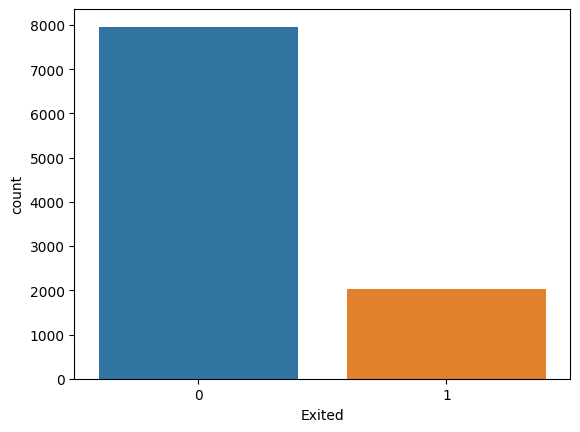

In [ ]:
# Countplot to visualize customer churn
sns.countplot(x='Exited',data=df)
plt.show()

0 represent customer remain with the bank


1 represent customer left the bank

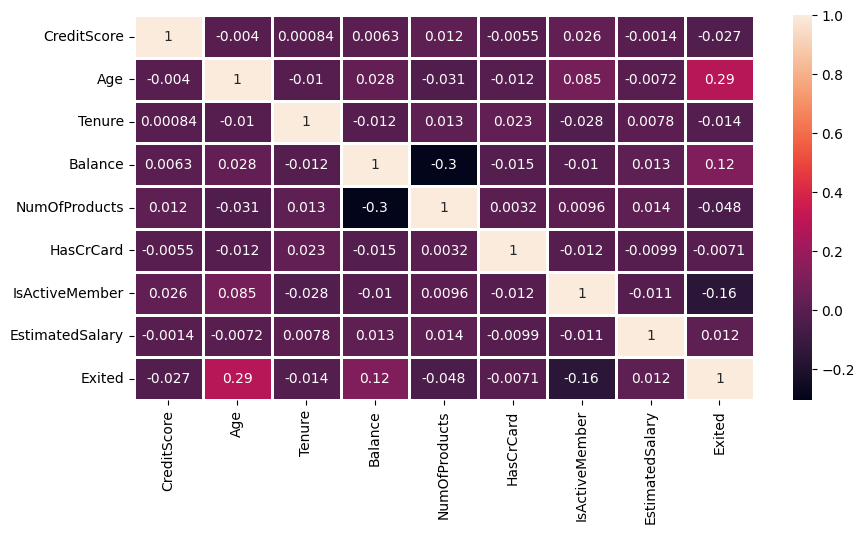

In [ ]:
# Heatmap
plt.figure(figsize=[10,5])
sns.heatmap(df.corr(),annot=True,linewidth=1)
plt.show()

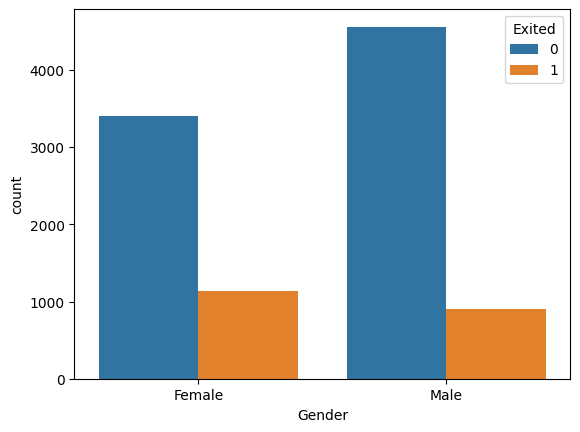

In [ ]:
# Countplot to visualize customer gender with respect to customer churn
sns.countplot(x='Gender',data=df,hue='Exited')
plt.show()

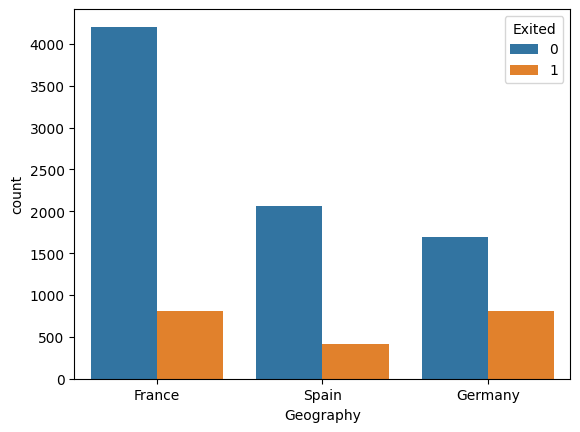

In [ ]:
# Countplot to visualize geography with respect to customer churn
sns.countplot(x='Geography',hue='Exited',data=df)
plt.show()

In [ ]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

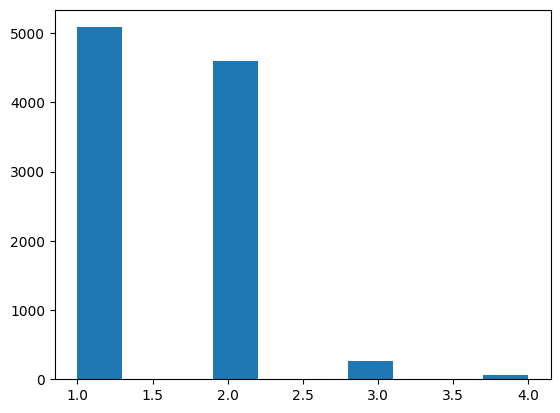

In [ ]:
# Histogram representing number of products
plt.hist(df['NumOfProducts'])
plt.show()

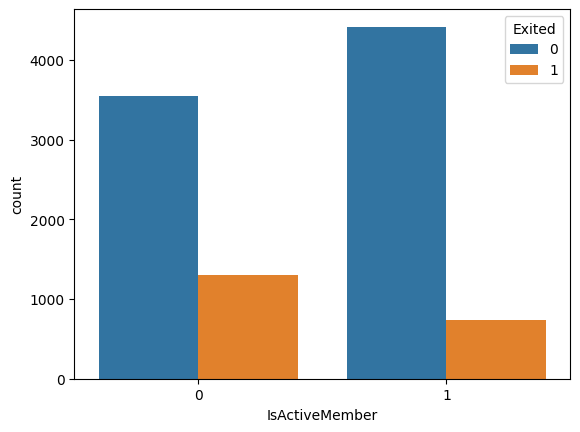

In [ ]:
# Countplot to visualize active customer count with respect to customer churn
sns.countplot(x='IsActiveMember',hue='Exited',data=df)
plt.show()

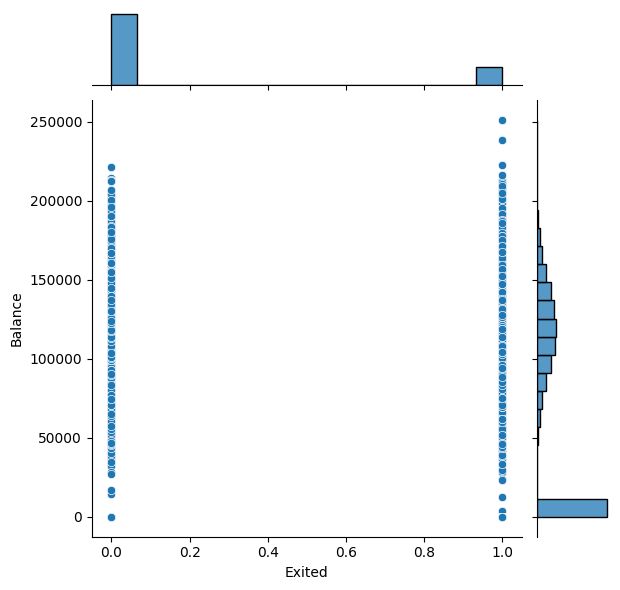

In [ ]:
# Jointplot
sns.jointplot(x='Exited',y='Balance',data=df)
plt.show()

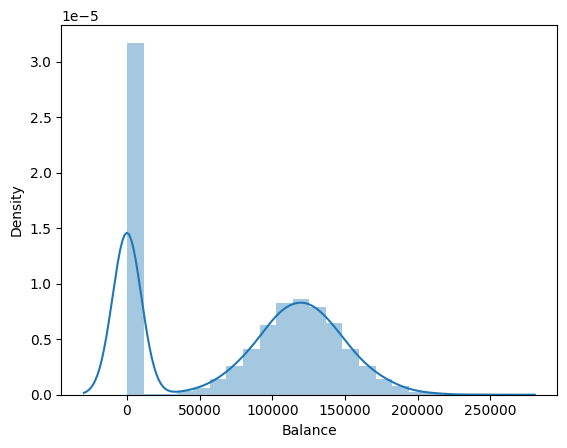

In [ ]:
# Distribution plot
sns.distplot(df['Balance'])
plt.show()

In [ ]:
# Convert categorical variables into numerical format
le=LabelEncoder()
lst=['Geography','Gender']
for i in lst:
  df[i]=le.fit_transform(df[i])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Check value count of the class label
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
# Splitting the features and class label
X=df.iloc[:,:-1]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
y=df.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
# Normalizing the data
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [ ]:
# Split Train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

****************************** KNeighborsClassifier() ******************************
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2373
           1       0.64      0.37      0.47       627

    accuracy                           0.82      3000
   macro avg       0.74      0.66      0.68      3000
weighted avg       0.81      0.82      0.81      3000

Accuracy 82.46666666666667
****************************** SVC() ******************************
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2373
           1       0.84      0.39      0.53       627

    accuracy                           0.86      3000
   macro avg       0.85      0.69      0.73      3000
weighted avg       0.86      0.86      0.84      3000

Accuracy 85.76666666666667
****************************** GaussianNB() ******************************
              precision    recall  f1-score   support

         

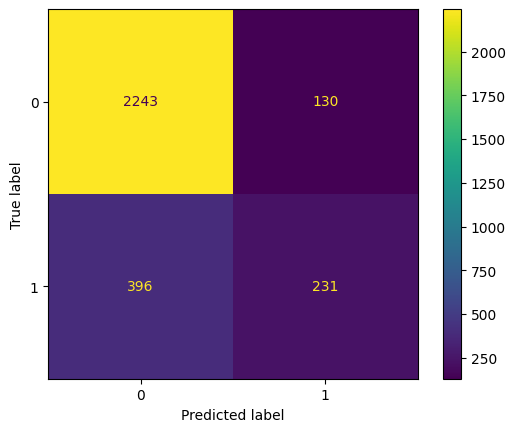

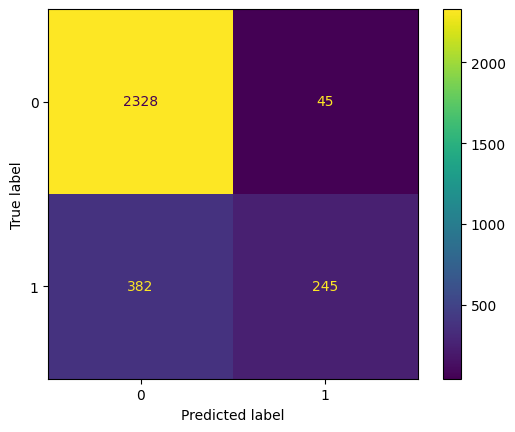

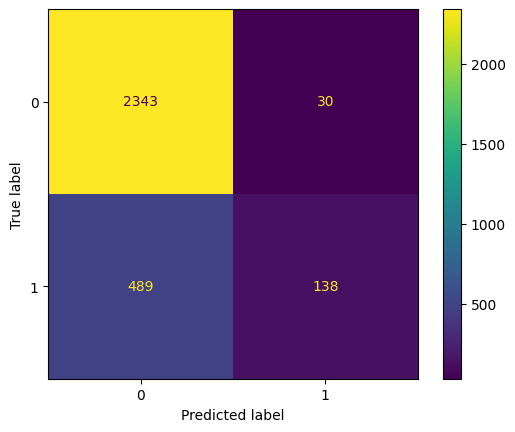

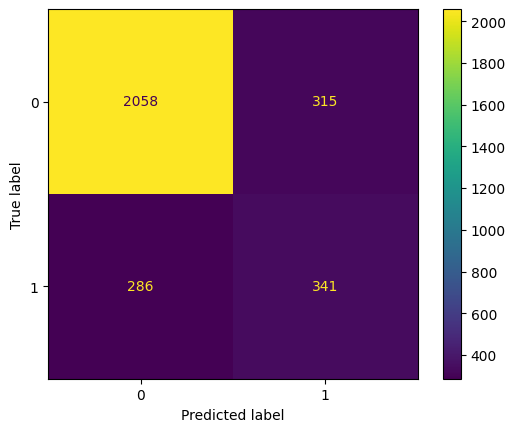

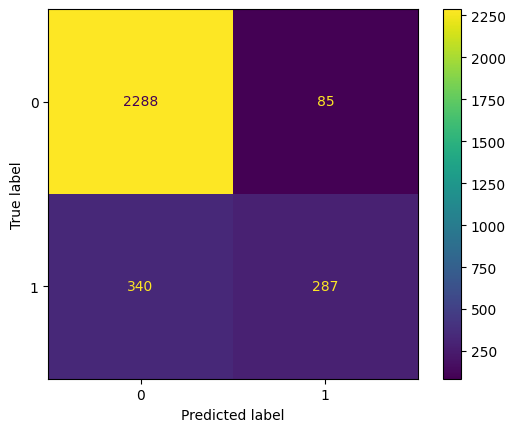

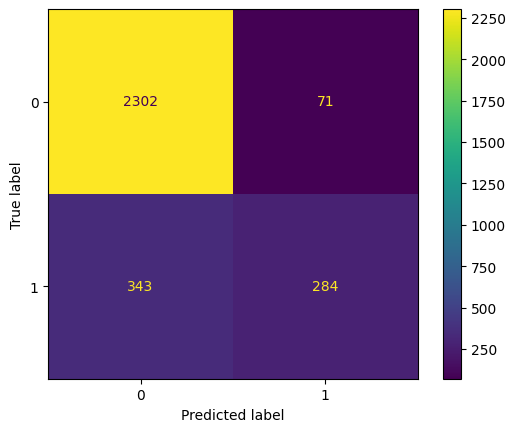

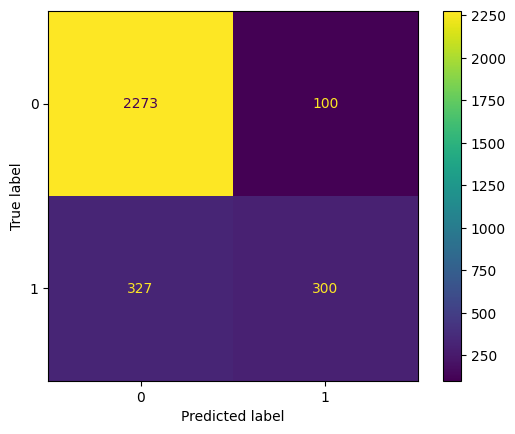

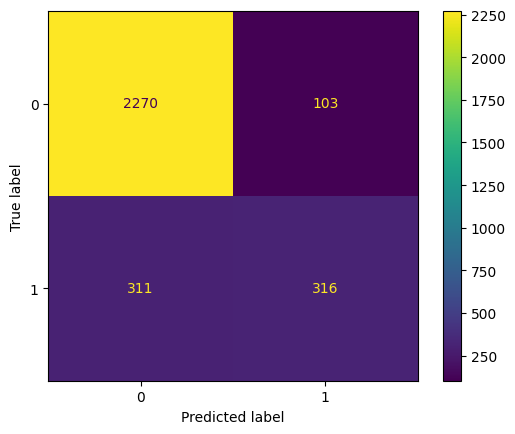

In [ ]:
# Applying Machine Learning Models
knn=KNeighborsClassifier()
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier(random_state=1)
ab=AdaBoostClassifier()
xg=XGBClassifier()
lst=[knn,sv,nb,dt,rf,gb,ab,xg]
acc=[]
for i in lst:
  print("*"*30,i,"*"*30)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print('Accuracy',accuracy_score(y_test,y_pred)*100)
  acc.append(accuracy_score(y_test,y_pred))
  acc

In [ ]:
# Accuracy score Comparison
Comparison=pd.DataFrame({'MODEL':['KNeighborsClassifier','SVC','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier'],'ACCURACY':acc},columns=['MODEL','ACCURACY'],index=[1,2,3,4,5,6,7,8])
table=Comparison.sort_values(['ACCURACY'],ascending=False,ignore_index=True)
table.style.highlight_max(subset=['ACCURACY'],color='green',axis=0)

,MODEL,ACCURACY
0,GradientBoostingClassifier,0.862000
1,XGBClassifier,0.862000
2,RandomForestClassifier,0.858333
3,SVC,0.857667
4,AdaBoostClassifier,0.857667
5,GaussianNB,0.827000
6,KNeighborsClassifier,0.824667
7,DecisionTreeClassifier,0.799667


Here we get the highest accuracy while using Gradient Boosting & XGBClassifier ie., 86.2%. We use Hyperparametric Tunning for Gradient Boosting to check for higher accuracy.

**HYPER PARAMETRIC TUNNING**

In [ ]:
# Hyperparametric tuning with Gradient Booster
params={'n_estimators':[1,20,30,50,100,500],'criterion':['friedman_mse', 'squared_error'],'max_depth':[3,8,15,25,50,100]},
clf=RandomizedSearchCV(gb,params,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'n_estimators': 20, 'max_depth': 8, 'criterion': 'squared_error'}


In [ ]:
gb=GradientBoostingClassifier(criterion='squared_error',max_depth=3,n_estimators=100)
gb.fit(X_train,y_train)
y_pred1=gb.predict(X_test)
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1)*100)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.80      0.45      0.58       627

    accuracy                           0.86      3000
   macro avg       0.84      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000

86.2


In [ ]:
# Hyperparametric tuning with XGBooster
params1={'learning_rate':[0.1,0.5,1,3,5,10],'n_estimators':[1,10,20,50,100,150,200],'max_depth':[1,3,5,10,15]}
clf1=RandomizedSearchCV(xg,params1,cv=5,scoring='accuracy')
clf1.fit(X_train,y_train)
print(clf1.best_params_)

{'n_estimators': 20, 'max_depth': 3, 'learning_rate': 0.5}


In [ ]:
xg=XGBClassifier(learning_rate=0.5,max_depth=5,n_estimators=20)
xg.fit(X_train,y_train)
y_pred2=xg.predict(X_test)
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2)*100)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2373
           1       0.75      0.52      0.61       627

    accuracy                           0.86      3000
   macro avg       0.81      0.74      0.76      3000
weighted avg       0.85      0.86      0.85      3000

86.26666666666667


**Principal Component Analysis**

In [ ]:

pca=PCA(n_components=4,random_state=1)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [ ]:
X_train_pca

array([[ 1.65396902, -0.95683677,  0.13558927, -1.71217032],
       [ 0.34423761,  0.25941294,  0.09152818, -2.61456413],
       [-0.85549465, -1.4240095 ,  0.27433218, -0.9484484 ],
       ...,
       [ 0.4075008 ,  0.59547759,  0.06862295, -1.03723182],
       [ 1.65376492,  0.43896293,  0.19646769, -0.72845274],
       [-0.93875048, -0.53622814, -1.16462382,  0.00611947]])

In [ ]:
pca.explained_variance_ratio_

array([0.13258488, 0.11155184, 0.10211329, 0.10184279])

****************************** KNeighborsClassifier() ******************************
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      2373
           1       0.48      0.22      0.31       627

    accuracy                           0.79      3000
   macro avg       0.65      0.58      0.59      3000
weighted avg       0.75      0.79      0.76      3000

Accuracy 78.76666666666667
****************************** SVC() ******************************
              precision    recall  f1-score   support

           0       0.79      1.00      0.89      2373
           1       0.88      0.02      0.05       627

    accuracy                           0.80      3000
   macro avg       0.84      0.51      0.47      3000
weighted avg       0.81      0.80      0.71      3000

Accuracy 79.53333333333333
****************************** GaussianNB() ******************************
              precision    recall  f1-score   support

         

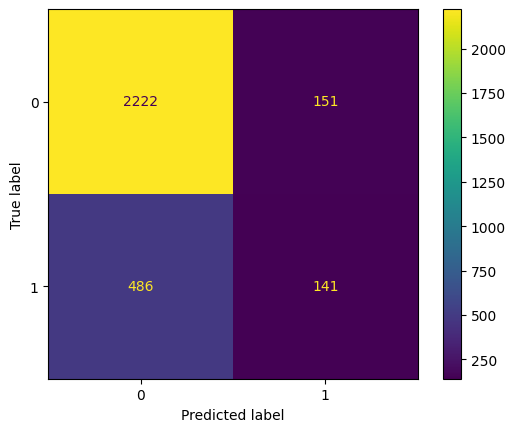

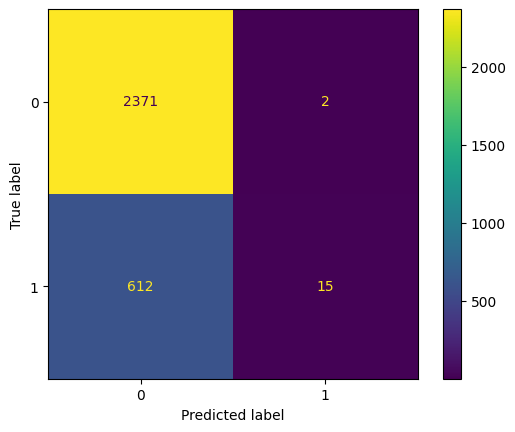

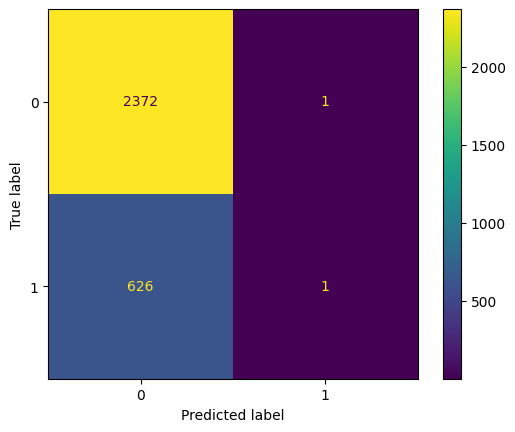

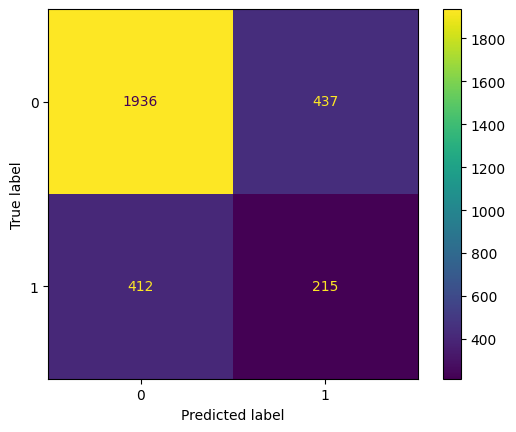

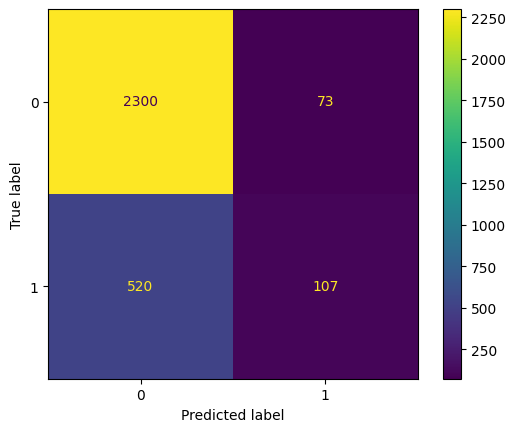

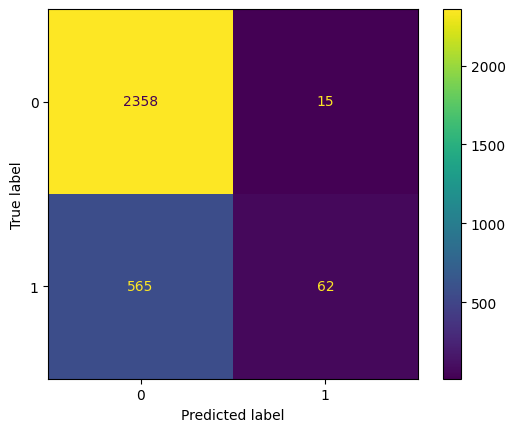

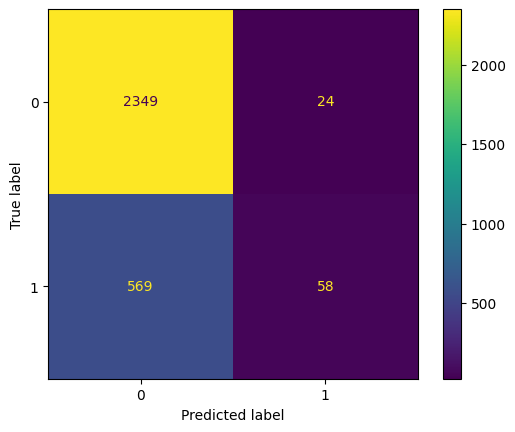

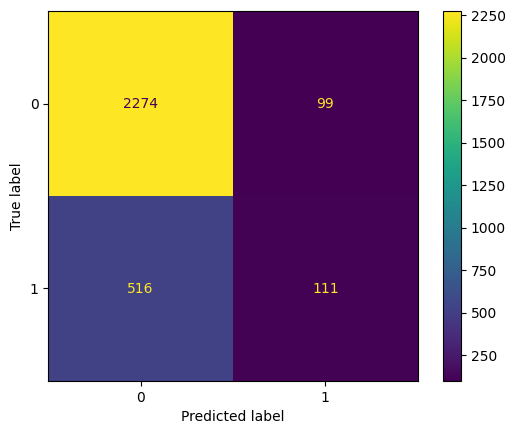

In [ ]:
knn_pca=KNeighborsClassifier()
sv_pca=SVC()
nb_pca=GaussianNB()
dt_pca=DecisionTreeClassifier()
rf_pca=RandomForestClassifier(random_state=1)
gb_pca=GradientBoostingClassifier(random_state=1)
ab_pca=AdaBoostClassifier()
xg_pca=XGBClassifier()
models=[knn_pca,sv_pca,nb_pca,dt_pca,rf_pca,gb_pca,ab_pca,xg_pca]
acc_pca=[]
for model in models:
  print("*"*30,model,"*"*30)
  model.fit(X_train_pca,y_train)
  y_pred_pca=model.predict(X_test_pca)
  print(classification_report(y_test,y_pred_pca))
  print('Accuracy',accuracy_score(y_test,y_pred_pca)*100)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_pca))
  acc_pca.append(accuracy_score(y_test,y_pred_pca))
  acc_pca

In [ ]:
Comparison_pca=pd.DataFrame({'MODEL_PCA':['knn_pca','sv_pca','nb_pca','dt_pca','rf_pca','gb_pca','ab_pca','xg_pca'],'ACCURACY_PCA':acc_pca},columns=['MODEL_PCA','ACCURACY_PCA'],index=[1,2,3,4,5,6,7,8])
table=Comparison_pca.sort_values(['ACCURACY_PCA'],ascending=False,ignore_index=True)
table.style.highlight_max(subset=['ACCURACY_PCA'],color='blue',axis=0)

,MODEL_PCA,ACCURACY_PCA
0,gb_pca,0.806667
1,rf_pca,0.802333
2,ab_pca,0.802333
3,sv_pca,0.795333
4,xg_pca,0.795000
5,nb_pca,0.791000
6,knn_pca,0.787667
7,dt_pca,0.717000


**OVERSAMPLING**

Borderline SMOTE - It classifies any minority observation as a noise point if all the neighbors are the majority class and such an observation is ignored while creating synthetic data

In [ ]:
# Oversampling using BorderlineSMOTE (Borderline Synthetic Minority Oversampling Technique)
os=BorderlineSMOTE()
X_os,y_os=os.fit_resample(X,y)

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
y_os.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

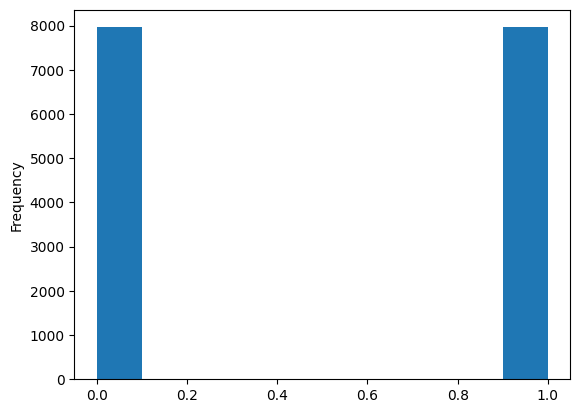

In [ ]:
y_os.plot(kind='hist')
plt.show()

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

****************************** KNeighborsClassifier() ******************************
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2322
           1       0.80      0.95      0.87      2456

    accuracy                           0.85      4778
   macro avg       0.87      0.85      0.85      4778
weighted avg       0.86      0.85      0.85      4778

85.22394307241524
****************************** SVC() ******************************
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      2322
           1       0.79      0.85      0.82      2456

    accuracy                           0.81      4778
   macro avg       0.81      0.80      0.80      4778
weighted avg       0.81      0.81      0.80      4778

80.53578903306823
****************************** GaussianNB() ******************************
              precision    recall  f1-score   support

           0       0.73    

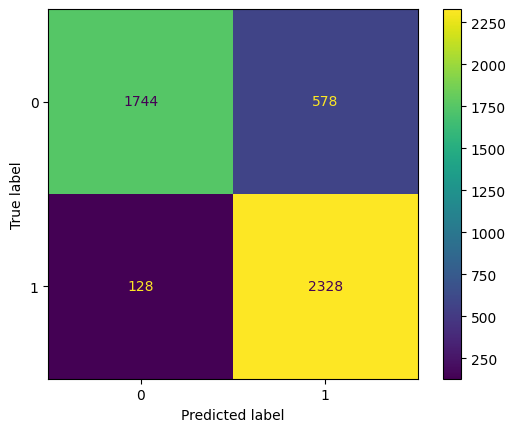

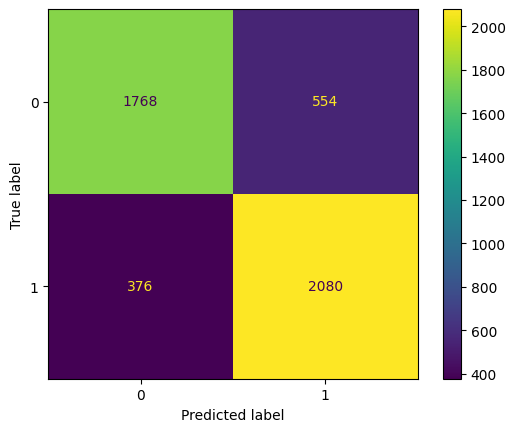

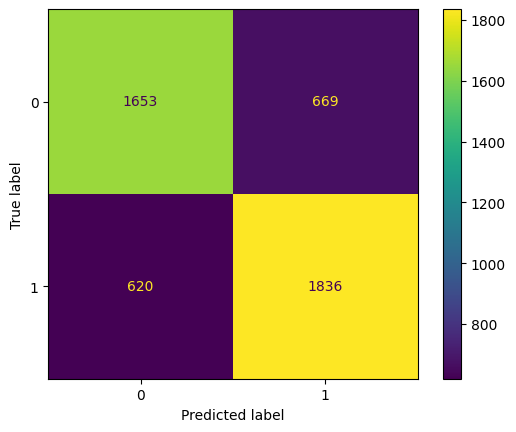

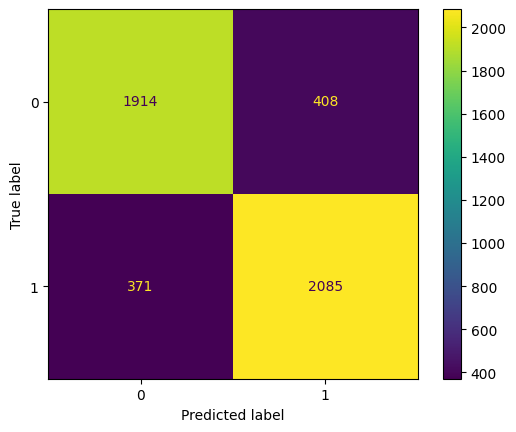

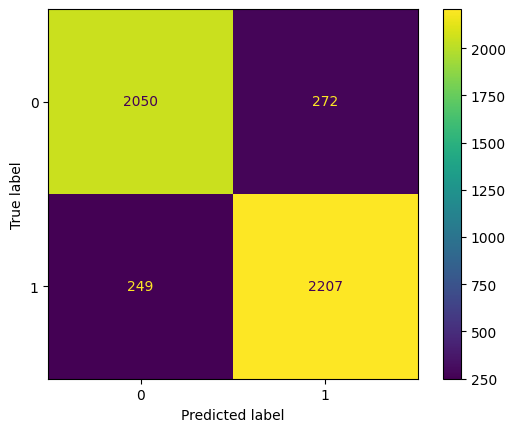

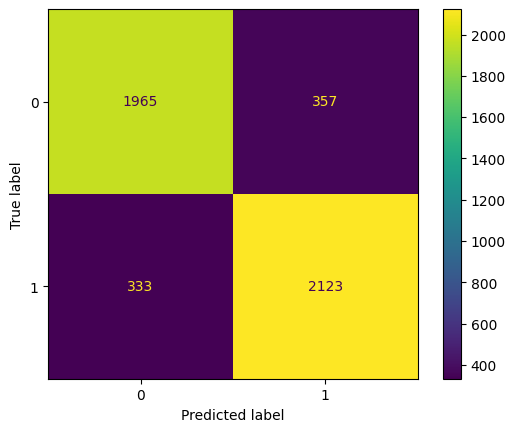

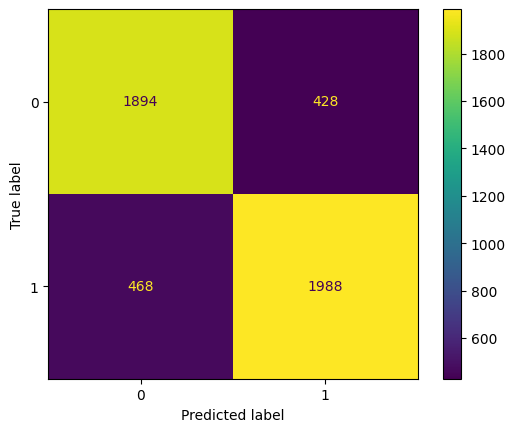

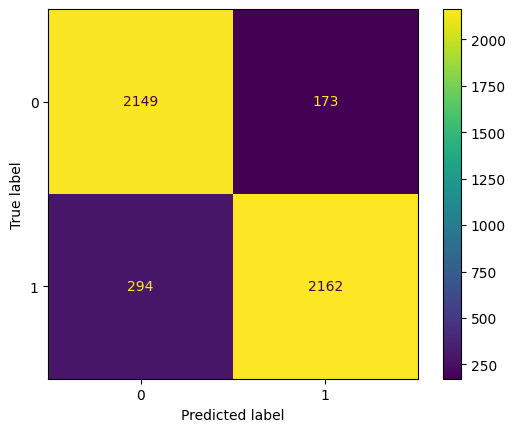

In [ ]:
knn_os=KNeighborsClassifier()
sv_os=SVC()
nb_os=GaussianNB()
dt_os=DecisionTreeClassifier()
rf_os=RandomForestClassifier(random_state=1)
gb_os=GradientBoostingClassifier(random_state=1)
ab_os=AdaBoostClassifier()
xg_os=XGBClassifier()
models=[knn_os,sv_os,nb_os,dt_os,rf_os,gb_os,ab_os,xg_os]
acc_os=[]
for model in models:
  print("*"*30,model,"*"*30)
  model.fit(X_train_os,y_train_os)
  y_pred_os=model.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))
  print(accuracy_score(y_test_os,y_pred_os)*100)
  print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_os))
  acc_os.append(accuracy_score(y_test_os,y_pred_os))
  acc_os

In [ ]:
Comparison_os=pd.DataFrame({'MODEL_OS':['knn_os','sv_os','nb_os','dt_os','rf_os','gb_os','ab_os','xg_os'],'ACCURACY_OS':acc_os},columns=['MODEL_OS','ACCURACY_OS'],index=[1,2,3,4,5,6,7,8])
table=Comparison_os.sort_values(['ACCURACY_OS'],ascending=False,ignore_index=True)
table.style.highlight_max(subset=['ACCURACY_OS'],color='green',axis=0)

,MODEL_OS,ACCURACY_OS
0,xg_os,0.902260
1,rf_os,0.890959
2,gb_os,0.855588
3,knn_os,0.852239
4,dt_os,0.836961
5,ab_os,0.812474
6,sv_os,0.805358
7,nb_os,0.730222


When the data is oversampled we can see that accuracy of the algorithms have increased and among all highest accuracy is for XGBClassifier that is 90%, the precision and recall scores are also very good for XGBoost.

**UNDERSAMPLING**

Random Under Sampler - In the random under-sampling, the majority class instances are discarded at random until a more balanced distribution is reached.

In [ ]:
# Undersampling the data using Random Under Sampler
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)

In [ ]:
X_us.shape,y_us.shape,X.shape,y.shape

((4074, 10), (4074,), (10000, 10), (10000,))

In [ ]:
y_us.value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='Frequency'>

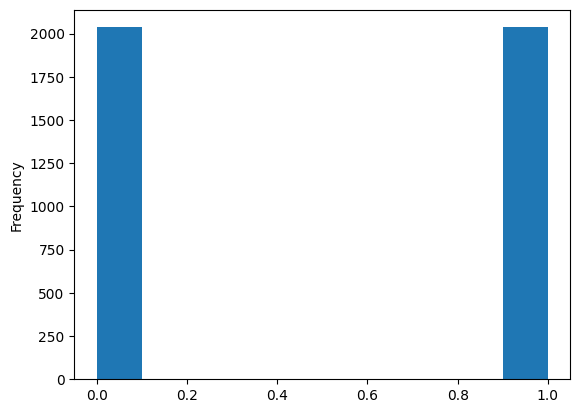

In [ ]:
y_us.plot(kind='hist')

In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

****************************** KNeighborsClassifier() ******************************
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       622
           1       0.75      0.70      0.72       601

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223

73.67130008176615
****************************** SVC() ******************************
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       622
           1       0.75      0.77      0.76       601

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223

76.36958299264106
****************************** GaussianNB() ******************************
              precision    recall  f1-score   support

           0       0.72    

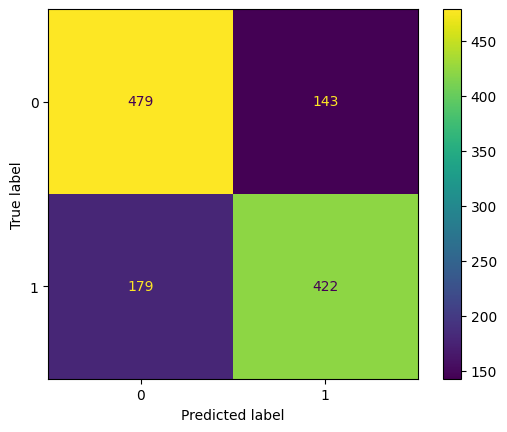

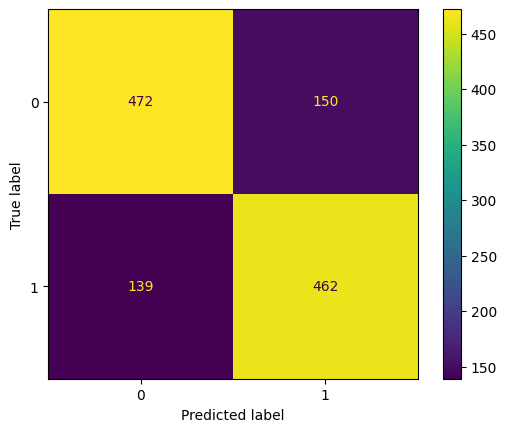

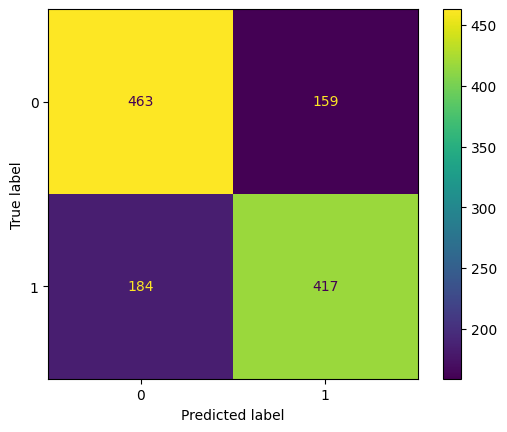

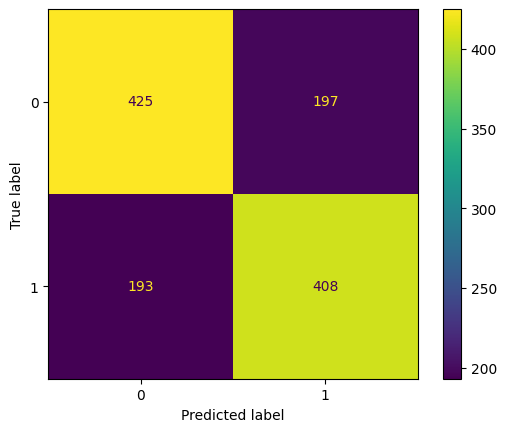

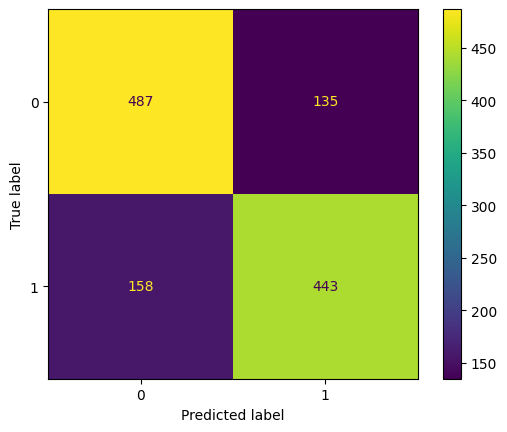

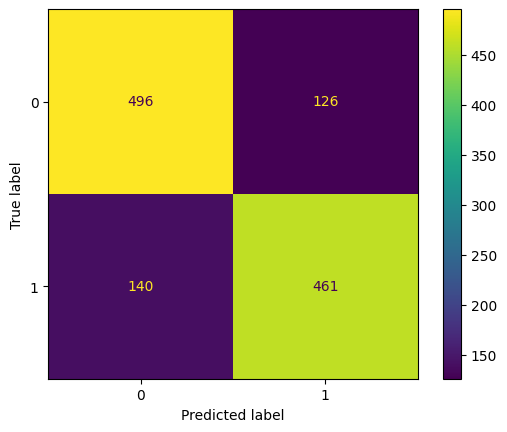

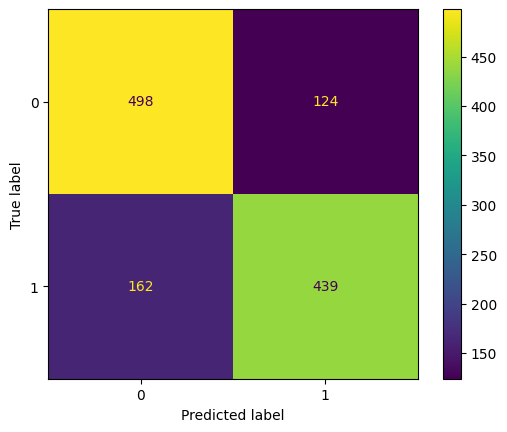

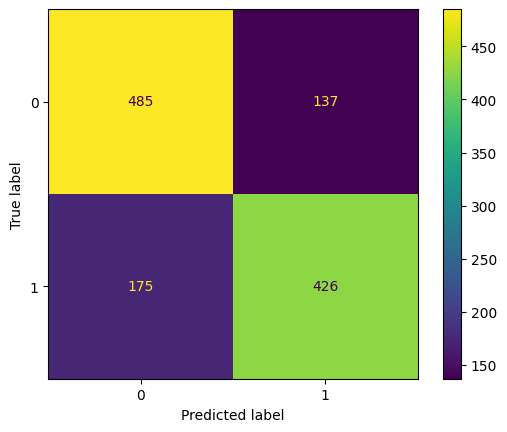

In [ ]:
knn_us=KNeighborsClassifier()
sv_us=SVC()
nb_us=GaussianNB()
dt_us=DecisionTreeClassifier()
rf_us=RandomForestClassifier(random_state=1)
gb_us=GradientBoostingClassifier(random_state=1)
ab_us=AdaBoostClassifier()
xg_us=XGBClassifier()
models=[knn_us,sv_us,nb_us,dt_us,rf_us,gb_us,ab_us,xg_us]
acc_us=[]
for model in models:
  print("*"*30,model,"*"*30)
  model.fit(X_train_us,y_train_us)
  y_pred_us=model.predict(X_test_us)
  print(classification_report(y_test_us,y_pred_us))
  print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_pred_us))
  print(accuracy_score(y_test_us,y_pred_us)*100)
  acc_us.append(accuracy_score(y_test_us,y_pred_us))
  acc_us

In [ ]:
Comparison_us=pd.DataFrame({'MODEL_US':['knn_us','sv_us','nb_us','dt_us','rf_us','gb_us','ab_us','xg_us'],'ACCURACY_US':acc_us},columns=['MODEL_US','ACCURACY_US'],index=[1,2,3,4,5,6,7,8])
table=Comparison_us.sort_values(['ACCURACY_US'],ascending=False,ignore_index=True)
table.style.highlight_max(subset=['ACCURACY_US'],color='green',axis=0)

,MODEL_US,ACCURACY_US
0,gb_us,0.782502
1,ab_us,0.766149
2,sv_us,0.763696
3,rf_us,0.760425
4,xg_us,0.744890
5,knn_us,0.736713
6,nb_us,0.719542
7,dt_us,0.681112


Using under sampling we can understand the accuracy of all the algorithms have reduced and among them the highest is Gradient Boost with only 78% accuracy.

# ***So from the above findings we can understand that the best algorithm for this dataset is XGBClassifier (Extreme Gradient Boosting) with Over-Sampling having an accuracy of 90% (with good scores for precision and recall aswell).***

In [ ]:
# Predicting with XGB Classifier
y_new=xg_os.predict(sc.transform([[792,0,0,28,4,130142.79,1,1,0,38190.78]]))
if y_new==1:
  print("Bank might lose the customer")
else:
  print("Bank will not lose the customer")

Bank will not lose the customer
